In [1]:
import sympy as sp
import jax.numpy as np
import matplotlib.pyplot as plt

In [2]:
from eq4 import config
from main import run

In [3]:
network, best = run(config)

16:31:45.881 [INFO] Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
16:31:45.883 [INFO] Unable to initialize backend 'gpu': NOT_FOUND: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
16:31:45.883 [INFO] Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
16:31:46.231 [INFO] Constructed symbolic model
16:32:12.921 [INFO] Constructed JAXified model
16:32:16.620 [INFO] Epoch: 1, Loss: 7.002682685852051
16:32:16.128 [INFO] Epoch: 10, Loss: 6.965089797973633
16:32:16.218 [INFO] Epoch: 20, Loss: 6.958316326141357
16:32:16.292 [INFO] Epoch: 30, Loss: 6.955451011657715
16:32:16.358 [INFO] Epoch: 40, Loss: 6.953210830688477
16:32:16.427 [INFO] Epoch: 50, Loss: 6.951003074645996
16:32:16.500 [INFO] Epoch: 60, Loss: 6.949069023132324
16:32:16.574 [INFO] Epoch: 70, Loss: 6.947060585021973
16:32:16.642 [INFO] Epoch: 80, Loss: 6.945369720458984
16:32:16.710 [INF

Nothing more to prune!


$\displaystyle 0.00350343273021281 x - 0.00167637426206345$

In [4]:
y_prediction_best = best.model_y.subs(zip(best.alphas, best.W))
y_prediction_best

0.00350343273021281*x - 0.00167637426206345

In [5]:
from jax import vmap
x = network.symbols.x
k = network.symbols.k
y_pred_fn = vmap(sp.lambdify([x, k], y_prediction_best), (0, None))
# y_real_fn = sp.lambdify(..?)

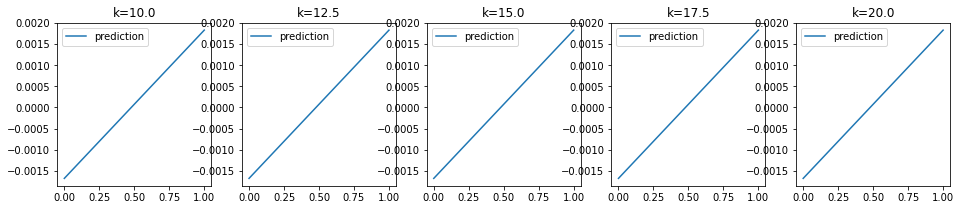

In [6]:
x_try = np.linspace(0, 1, 50)

k_tries = np.linspace(10, 20, 5, True)
fig, axs = plt.subplots(1, len(k_tries))
fig.set_size_inches(len(k_tries)*3.2, 3)

for ax, k_try in zip(axs, k_tries):
  ax.set_title(f'k={k_try}')
  ax.plot(x_try, y_pred_fn(x_try, k_try), label=f'prediction')
  # ax.plot(x_try, y_real_fn(x_try, k_try), label=f'actual')
  ax.legend()
plt.show()